In [30]:

import os

import numpy as np

import pandas as pd

from matplotlib import pyplot

from scipy import optimize

from scipy.io import loadmat

%matplotlib inline

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:

input_layer_size  = 784

num_labels = 26
data = pd.read_csv("/content/drive/MyDrive/USFX/SIS420-IA/datasets/emnist-letters.csv")

data = data.to_numpy()

X, y = data[:, 1:], data[:, 0]
print(X)

print(y)

m = y.size

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[ 7 16 15 ...  1 23 12]


In [33]:
data.shape


(88799, 785)

In [34]:
print(X)
print('*'*25)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
*************************
[ 7 16 15 ...  1 23 12]


In [35]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """

    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

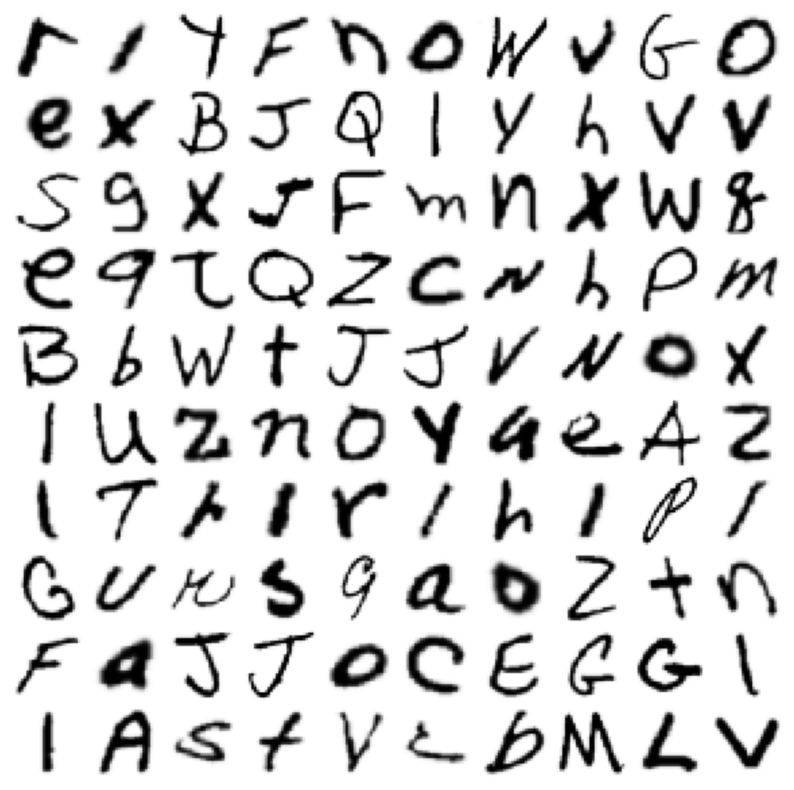

In [36]:

rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [37]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/26.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

In [38]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    clipped_z=np.clip(z,-700,700)
    return 1.0 / (1.0 + np.exp(-clipped_z))

In [39]:
def lrCostFunction(theta, X, y, lambda_):

    m = y.size


    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0
    epsilon= 1e-15

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)

    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [40]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperado: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.654599
Costo esperado: 2.534819
-----------------------
Gradientes:
 [-0.291135, -0.632332, 0.511681, 1.055693]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [41]:
def oneVsAll(X, y, num_labels, lambda_):

    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [42]:
lambda_ = 0.01
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-39-c018cde65acb>:18: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))


In [43]:
print(all_theta.shape)
print(all_theta[0])

(26, 785)
[-6.01961342e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.77892028e-09 -2.39973778e-06 -1.00870334e-05 -1.48322776e-05
 -1.29341799e-05 -1.03175167e-05 -6.25016450e-06 -1.92521336e-06
 -5.08419021e-07 -2.57598971e-07 -2.50820050e-07 -3.07762981e-06
 -5.51126219e-06 -8.66346012e-06 -1.02361696e-05 -4.92827505e-06
 -1.84386632e-06 -4.03345757e-06 -3.10474549e-06 -1.89809768e-07
 -1.35578406e-08 -6.77892028e-09  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.81259637e-08 -3.24710282e-06
 -1.98418997e-05 -5.02521361e-05 -9.77384727e-05 -1.49617550e-04
 -1.86616896e-04 -2.03381166e-04 -2.04818297e-04 -1.68944251e-04
 -1.32385534e-04 -1.25125311e-04 -1.27118313e-04 -1.64436269e-04
 -1.94683812e-04 -2.23467107e-04 -2.64845637e-04 -2.91568140e-04
 -2.94950822e-04 -2.77745922e-04 -2.53151999e-04 -2.12112416e-04
 -1.52383349e-04 -8.35095190e-05 -2.96238816e-05 -1.76251927e-06
 -6.77892028e-09  0.00000000e+00 -3.61316451e-06 -1.06185007e-04
 -4.56451818e-0

In [44]:
def predictOneVsAll(all_theta, X):


    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(88799, 784)
Precision del conjuto de entrenamiento: 67.87%
(1, 784)
(1, 785)
[7]


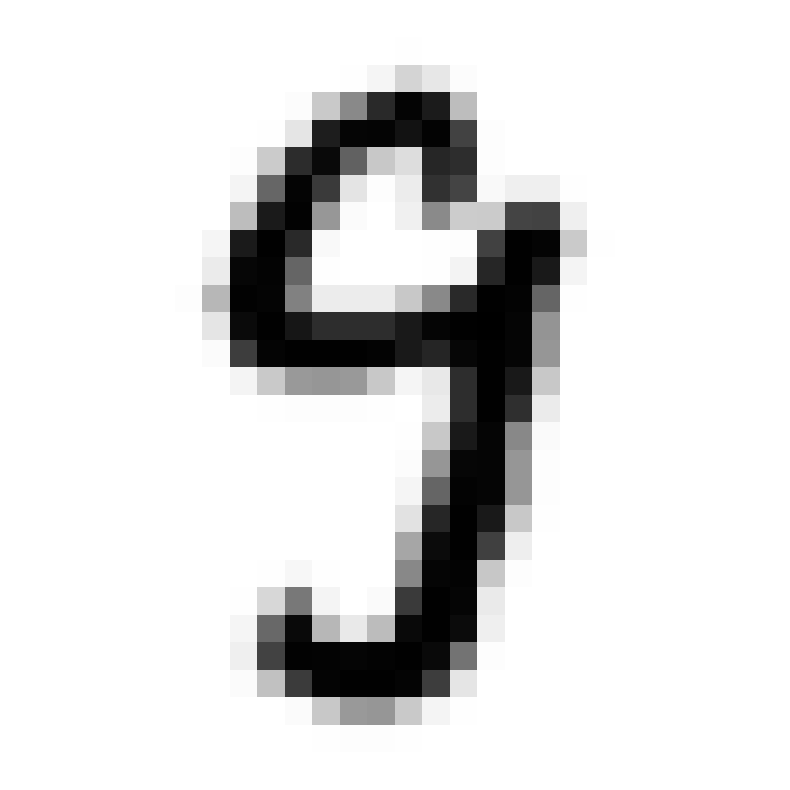

In [45]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[380:381, :].copy()
print(XPrueba.shape)

XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

displayData(X[380:381, :])